In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets as data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
%matplotlib inline

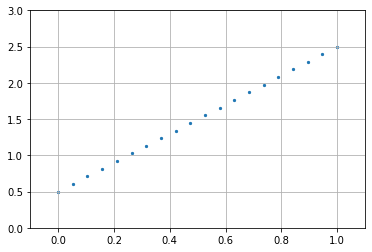

In [2]:
x = np.linspace(0, 1, 20)
m = 2
c = 0.5
y = m * x + c
plt.scatter(x, y, s=5)
plt.axis([-0.1, 1.1, 0, 3])
plt.grid()

In [3]:
lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y)

LinearRegression()

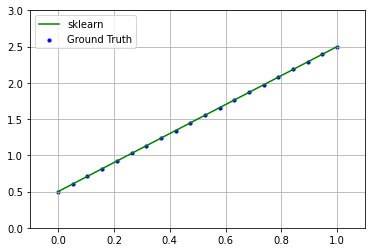

In [4]:
yhat = lr.predict(x.reshape(-1, 1))
plt.scatter(x, y, s=10, c='b', label='Ground Truth')
plt.plot(x, yhat, 'g-', label='sklearn')
plt.axis([-0.1, 1.1, 0, 3])
plt.legend()
plt.grid()

In [5]:
lr.coef_

array([2.])

In [6]:
lr.intercept_

0.5000000000000006

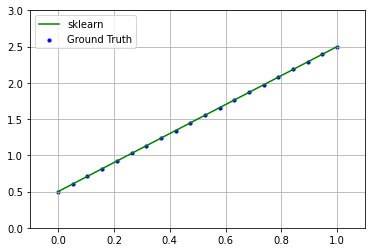

In [7]:
yhat = np.dot(x.reshape(-1, 1), lr.coef_) + lr.intercept_

plt.scatter(x, y, s=10, c='b', label='Ground Truth')
plt.plot(x, yhat, 'g-', label='sklearn')
plt.axis([-0.1, 1.1, 0, 3])
plt.legend()
plt.grid()

# In Video Question

In [8]:
m = 13
c= 1.34
x = np.linspace(0,1,100)
y = m*x+c
lr =LinearRegression()
lr.fit (x.reshape(-1,1),y)
print(lr.coef_)
lr.intercept_

[13.]


1.3400000000000007

## **Exercise**: Pick a random slope and intercept; and draw a line. Find the correct slope and intercept with sklearn.

In [9]:
# enter code here
x = np.linspace(0,20,100)
m=0.84
c=1.50
y = m*x +c 
print(x)
print(y)

[ 0.          0.2020202   0.4040404   0.60606061  0.80808081  1.01010101
  1.21212121  1.41414141  1.61616162  1.81818182  2.02020202  2.22222222
  2.42424242  2.62626263  2.82828283  3.03030303  3.23232323  3.43434343
  3.63636364  3.83838384  4.04040404  4.24242424  4.44444444  4.64646465
  4.84848485  5.05050505  5.25252525  5.45454545  5.65656566  5.85858586
  6.06060606  6.26262626  6.46464646  6.66666667  6.86868687  7.07070707
  7.27272727  7.47474747  7.67676768  7.87878788  8.08080808  8.28282828
  8.48484848  8.68686869  8.88888889  9.09090909  9.29292929  9.49494949
  9.6969697   9.8989899  10.1010101  10.3030303  10.50505051 10.70707071
 10.90909091 11.11111111 11.31313131 11.51515152 11.71717172 11.91919192
 12.12121212 12.32323232 12.52525253 12.72727273 12.92929293 13.13131313
 13.33333333 13.53535354 13.73737374 13.93939394 14.14141414 14.34343434
 14.54545455 14.74747475 14.94949495 15.15151515 15.35353535 15.55555556
 15.75757576 15.95959596 16.16161616 16.36363636 16

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x.reshape(-1,1),y)
lr

LinearRegression()

In [11]:
yhat = lr.predict(x.reshape(-1,1))

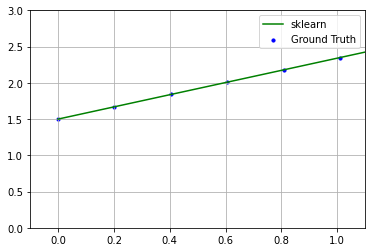

In [12]:
plt.scatter(x, y, c='b',s=10, label='Ground Truth')
plt.plot(x, yhat, 'g-', label='sklearn')
plt.axis([-0.1, 1.1, 0, 3])
plt.legend()
plt.grid()

In [13]:
lr.coef_

array([0.84])

In [14]:
lr.intercept_

1.5

In [15]:
help(lr)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subt

In [16]:
lr.score(x.reshape(-1,1),y)

1.0

# Multiple Regression with sklearn

In [17]:
boston = data.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['value'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
y = boston.target
X = boston.data
lr.fit(X, y)

LinearRegression()

In [19]:
yhat = lr.predict(X)

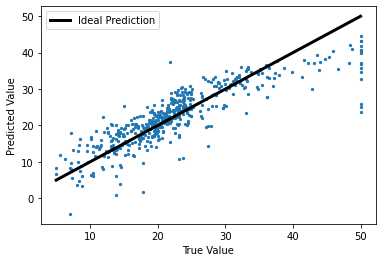

In [20]:
plt.scatter(y, yhat, s=5)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k', linewidth=3, label='Ideal Prediction')
plt.legend()

## Measuring Error

In [21]:
mean_squared_error(y, yhat)

21.894831181729206

In [22]:
r2_score(y, yhat)

0.7406426641094094

## Importance of individual features

<AxesSubplot:>

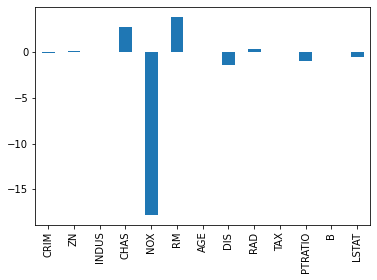

In [23]:
f_imp = pd.Series(lr.coef_, index=boston.feature_names)
f_imp.plot(kind='bar')

## Exercise: How do we interpret this?

In [24]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

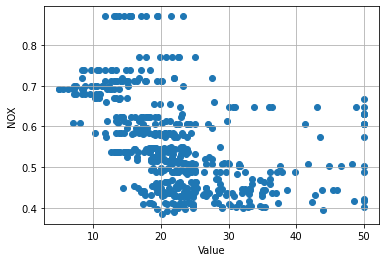

In [25]:
plt.scatter(y, df['NOX'].values)
plt.xlabel('Value')
plt.ylabel('NOX')
plt.grid()

In [26]:
nox = df['NOX'].values
y = df['value'].values
lr.fit(nox.reshape(-1, 1), y)
yhat = lr.predict(nox.reshape(-1, 1))

r2_score(y, yhat)

0.182603042501699

In [27]:
lr.coef_

array([-33.91605501])

# Exercise

In [28]:
#Code starts here
from sklearn import datasets as data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
boston = data.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['value'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [29]:
X = df.loc[:,['NOX','CHAS']]
y = df.loc[:,'value']
print(X)
print(y)

       NOX  CHAS
0    0.538   0.0
1    0.469   0.0
2    0.469   0.0
3    0.458   0.0
4    0.458   0.0
..     ...   ...
501  0.573   0.0
502  0.573   0.0
503  0.573   0.0
504  0.573   0.0
505  0.573   0.0

[506 rows x 2 columns]
0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: value, Length: 506, dtype: float64


In [30]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(X,y)
lr1

LinearRegression()

In [31]:
yhat = lr1.predict(X)
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error(y,yhat)

65.09728775624397

In [32]:
r2_score(y,yhat)

0.22888379517392654

## Cumumlative feature variances

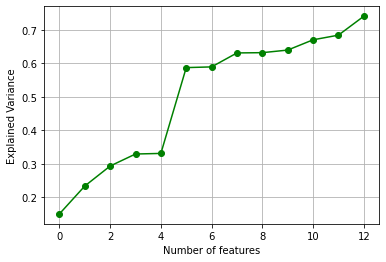

In [33]:
y = boston.target
X = boston.data
variances = []
for i in range(X.shape[1]):
    xx = X[:, :(i + 1)]
    lr.fit(xx, y)
    variances.append(explained_variance_score(y, lr.predict(X[:, :(i + 1)])))

plt.plot(variances, 'go-')
plt.xlabel('Number of features')
plt.ylabel('Explained Variance')
plt.grid()

## **Exercise**
### Use the Diabetes dataset (provided below) to fit a linear regression model.
### Rank the features in order of _decreasing_ importance.

In [34]:
diabetest = data.load_diabetes()

In [56]:
# enter code here
df = pd.DataFrame(diabetest.data, columns = diabetest.feature_names)
df['y'] = diabetest.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [57]:
print(diabetest.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [59]:
X = diabetest.data
y = diabetest.target
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [60]:
lr.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

<AxesSubplot:>

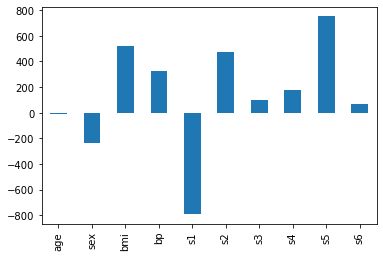

In [61]:
features = pd.Series(lr.coef_,diabetest.feature_names)
features.plot(kind='bar')

<AxesSubplot:>

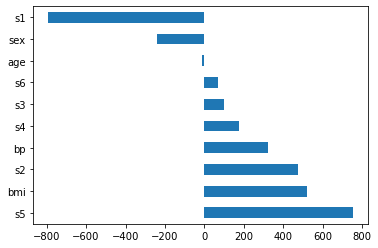

In [63]:
features.sort_values(ascending=False,inplace=True)
features.plot(kind='barh')